In [31]:
import cv2, os, imutils, math
from matplotlib import pyplot as plt
import numpy as np

In [32]:
PATH_ON_DATA_IMAGE = 'spinal/data'
PATH_ON_LABELS_IMAGE = 'spinal/labels'
PATH_ON_MASK_IMAGE = 'spinal/masks'
files = os.listdir(PATH_ON_LABELS_IMAGE)

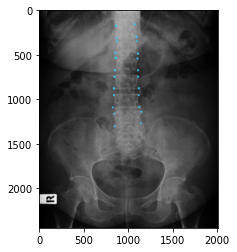

In [33]:
selected_file = files[10].split(".")[0]
image = cv2.imread(PATH_ON_LABELS_IMAGE+"/"+selected_file+".jpeg")
plt.imshow(image)

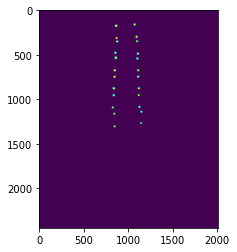

In [34]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_yellow = np.array([21, 39, 64])
upper_yellow = np.array([40, 255, 255])
image_range = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
plt.imshow(image_range)

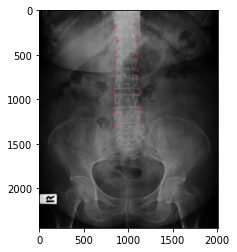

In [35]:
contours, hierarchy = cv2.findContours(image_range, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
        contour_list.append(contour)

# contour = contours[23]
# approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
# area = cv2.contourArea(contour)
# if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
#     contour_list.append(contour)


original_image = cv2.imread(PATH_ON_DATA_IMAGE+"/"+selected_file+".jpg")
cv2.drawContours(original_image, contour_list,  -1, (255,0,0), 2)
plt.imshow(original_image)

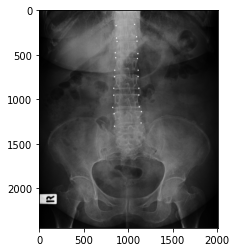

In [36]:
cnts = cv2.findContours(image_range, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

original_image = cv2.imread(PATH_ON_DATA_IMAGE+"/"+selected_file+".jpg")
# loop over the contours
center_list = []
for index, c in enumerate(cnts, start=1):
	M = cv2.moments(c)
	cX = int(M["m10"] / M["m00"])
	cY = int(M["m01"] / M["m00"])
	cv2.circle(original_image, (cX, cY), 7, (255, 255, 255), -1)
	# cv2.drawContours(original_imindexage, [c], -1, (0, 255, 0), 2)
	# cv2.putText(image, str(index), (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
	center_list.append((cX, cY))

plt.imshow(original_image)
# cv2.imwrite(PATH_ON_MASK_IMAGE+"/"+selected_file+".jpeg", original_image)
# print(PATH_ON_MASK_IMAGE+"/"+selected_file+".jpeg")

In [37]:
## Draw bottom line of spine

# Config
green_color = (0, 255, 0)
thickness = 2 # Line weight

# Buttom line
start_point_a = center_list[0]
end_point_a = center_list[1]

# Draw Buttom line
line_image = cv2.line(original_image, start_point_a, end_point_a, green_color, thickness) 

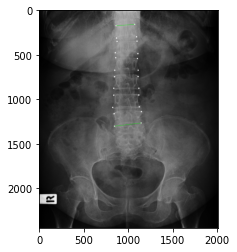

In [38]:
## Draw top line of spine

# Top line
start_point_b = center_list[22]
end_point_b = center_list[23]

# Draw Top line
line_image = cv2.line(original_image, start_point_b, end_point_b, green_color, thickness) 
plt.imshow(line_image)

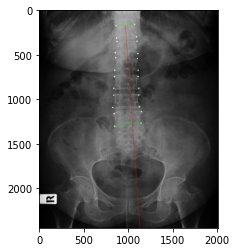

In [39]:
### Perpendicular of First line..
# Acture: x2 = x1 + length * cos(θ)
# Acture: y2 = y1 + length * sin(θ) 
# How to find: θ = angle * 3.14 / 180.0
# Coding: (int)round(P1.x + length * cos(angle * CV_PI / 180.0))

x1 = start_point_b[0]
y1 = start_point_b[1]
x2 = end_point_b[0]
y2 = end_point_b[1]

# Center of line
x_mid_point = (x1 + x2)/2
y_mid_point = (y1 + y2)/2

# Find degree current line
additional_degree = 90
deegree = (math.degrees(math.atan2((y2 - y1), (x2 - x1))) + additional_degree)

image.shape
# Option
red_color = (255, 0, 0)
length = (image.shape[0] - y_mid_point)
# Find perpendicular line
upper_x_point =  int(x_mid_point + length * math.cos(deegree * math.pi / 180.0))
upper_y_point = int(y_mid_point + length * math.sin(deegree * math.pi / 180.0))

upper_start = (int(x_mid_point), int(y_mid_point))
upper_end = (upper_x_point, upper_y_point)

line_image = cv2.line(original_image, upper_start, upper_end, red_color, thickness) 
plt.imshow(line_image)


In [40]:
# Define funtion -> Find intersector line
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

# print line_intersection((A, B), (C, D))

In [41]:
x1 = start_point_a[0]
y1 = start_point_a[1]
x2 = end_point_a[0]
y2 = end_point_a[1]

upper = (upper_start, upper_end)
bottom = ((x1, y1), (x2, y2))
buttom_intersec_x, buttom_intersec_y = line_intersection(upper, bottom)

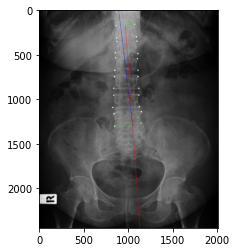

In [42]:
x1 = start_point_a[0]
y1 = start_point_a[1]
x2 = end_point_a[0]
y2 = end_point_a[1]

# Center of line
x_mid_point = (x1 + x2)/2
y_mid_point = (y1 + y2)/2

# Find degree current line
additional_degree = -90
deegree = (math.degrees(math.atan2((y2 - y1), (x2 - x1))) + additional_degree)

# Option
blue_color = (0, 0, 255)
length = y_mid_point 
# Find perpendicular line
# x_mid_point | y_mid_point
x_point =  int(buttom_intersec_x + length * math.cos(deegree * math.pi / 180.0))
y_point = int(buttom_intersec_y + length * math.sin(deegree * math.pi / 180.0))

lower_start = (int(buttom_intersec_x), int(buttom_intersec_y))
lower_end = (x_point, y_point)

line_image = cv2.line(original_image, lower_start, lower_end, blue_color, thickness) 
plt.imshow(line_image)

In [50]:
# Finding angle between 2 lines
def calcAngle(lineA,lineB):
    line1Y1 = lineA[0][1]
    line1X1 = lineA[0][0]
    line1Y2 = lineA[1][1]
    line1X2 = lineA[1][0]

    line2Y1 = lineB[0][1]
    line2X1 = lineB[0][0]
    line2Y2 = lineB[1][1]
    line2X2 = lineB[1][0]

    #calculate angle between pairs of lines
    angle1 = math.atan2(line1Y1-line1Y2,line1X1-line1X2)
    angle2 = math.atan2(line2Y1-line2Y2,line2X1-line2X2)
    angleDegrees = (angle1-angle2) * 360 / (2*math.pi)
    print(math.floor(angleDegrees))
    return angleDegrees

In [54]:
upper_perpendicular_line = (upper_start, upper_end)
lower_perpendicular_line = (lower_start, lower_end)

cobb_angle = calcAngle(lower_perpendicular_line, upper_perpendicular_line) - 180

177


In [55]:
cobb_angle

-2.783531289464264